# Name:Muhammad Shafeen
# Roll No:22P-9278
# Section : BSAI-4A

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("HousingData.csv")
data.head()

data=data.fillna(round(data.mean()))
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data= pd.DataFrame(data_scaled, columns=data.columns)
Q1 = data.quantile(0.25)
Q2=data.quantile(0.50)
Q3 = data.quantile(0.75)
IQR=Q3-Q1
lowerlimit=Q1-1.5*IQR
upperlimit=Q3+1.5*IQR
for column in data.columns:
    data[column]=np.where((data[column]<lowerlimit[column]) | (data[column]>upperlimit[column]),data[column].median(),data[column])

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.0,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.014924,0.026374,0.389321,0.0,0.349167,0.511735,0.675979,0.235430,0.371713,0.422208,0.642261,0.980387,0.289587,0.350158
std,0.025683,0.065924,0.245571,0.0,0.238431,0.099161,0.282591,0.180090,0.378576,0.321636,0.206105,0.026073,0.172027,0.137600
min,0.000000,0.000000,0.000000,0.0,0.000000,0.252730,0.000000,0.000000,0.000000,0.000000,0.106383,0.868904,0.000000,0.013333
25%,0.000865,0.000000,0.173387,0.0,0.131687,0.448122,0.443100,0.088259,0.130435,0.175573,0.510638,0.977848,0.151766,0.268889
50%,0.003188,0.000000,0.346041,0.0,0.314815,0.507281,0.736869,0.188574,0.173913,0.272901,0.688830,0.986245,0.283044,0.360000
75%,0.013221,0.000000,0.646628,0.0,0.491770,0.566057,0.933831,0.362195,1.000000,0.914122,0.808511,0.998298,0.396868,0.417778
max,0.110343,0.250000,1.000000,0.0,1.000000,0.791339,1.000000,0.735962,1.000000,1.000000,1.000000,1.000000,0.779249,0.700000


In [6]:
X=data.drop("MEDV",axis=1)
y=data["MEDV"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)
Model=LinearRegression()
Model.fit(X_train,y_train)
y_pred = Model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Intercept:", Model.intercept_)
print("Slope:", Model.coef_[0])

Mean Squared Error: 0.0058743845411903545
Intercept: 0.43513378283999316
Slope: 0.48786272591085883


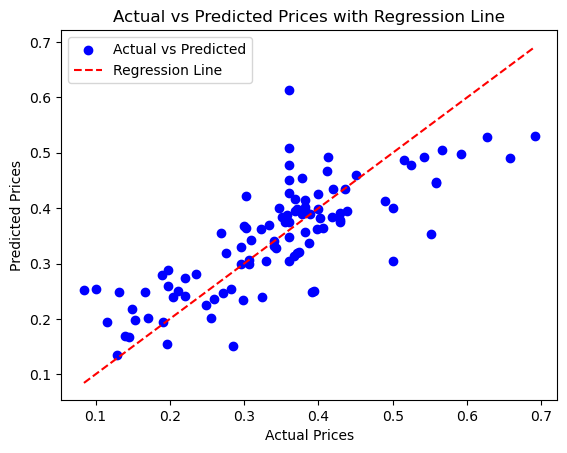

In [7]:
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices with Regression Line")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Regression Line')
plt.legend()
plt.show()